In [5]:
import pandas as pd
import matplotlib.pyplot as plt

grubhub_data = pd.read_csv('restaurant_details_grubhub.csv')
ubereats_data = pd.read_csv('restaurant_details_ubereats.csv')

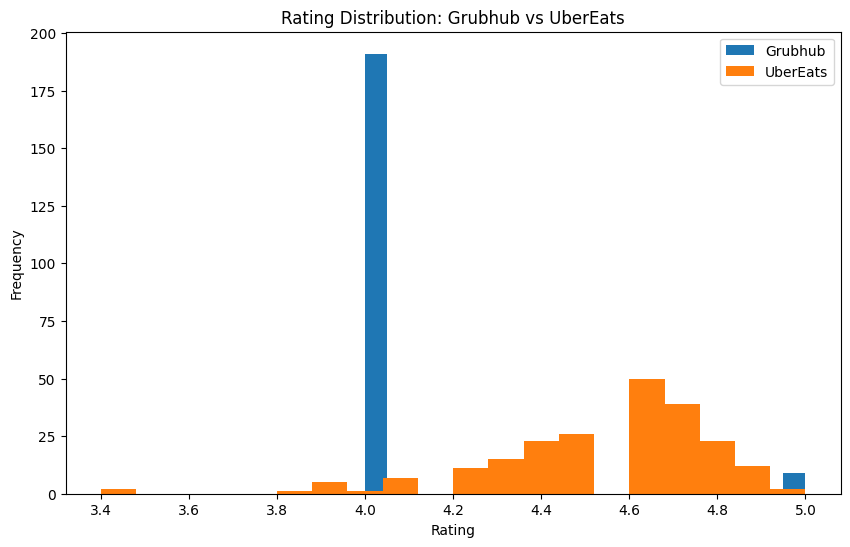

In [6]:
plt.figure(figsize=(10,6))
plt.hist(grubhub_data['Rating'], label='Grubhub', bins=20)
plt.hist(ubereats_data['Rating'], label='UberEats', bins=20)
plt.title('Rating Distribution: Grubhub vs UberEats')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

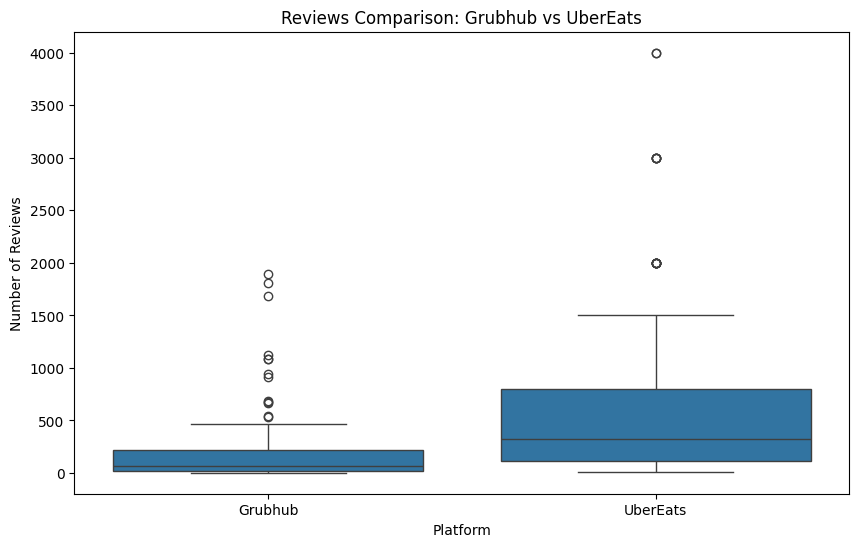

In [7]:
import seaborn as sns
grubhub_data['Platform'] = 'Grubhub'
ubereats_data['Platform'] = 'UberEats'

combined_data = pd.concat([grubhub_data[['Rating', 'Reviews', 'Delivery Time', 'Platform']],
                           ubereats_data[['Rating', 'Reviews', 'Delivery Time', 'Platform']]])
combined_data['Reviews'] = combined_data['Reviews'].replace({',': '', '\+': ''}, regex=True)
combined_data['Reviews'] = pd.to_numeric(combined_data['Reviews'], errors='coerce')

plt.figure(figsize=(10,6))
sns.boxplot(x='Platform', y='Reviews', data=combined_data)
plt.title('Reviews Comparison: Grubhub vs UberEats')
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.show()

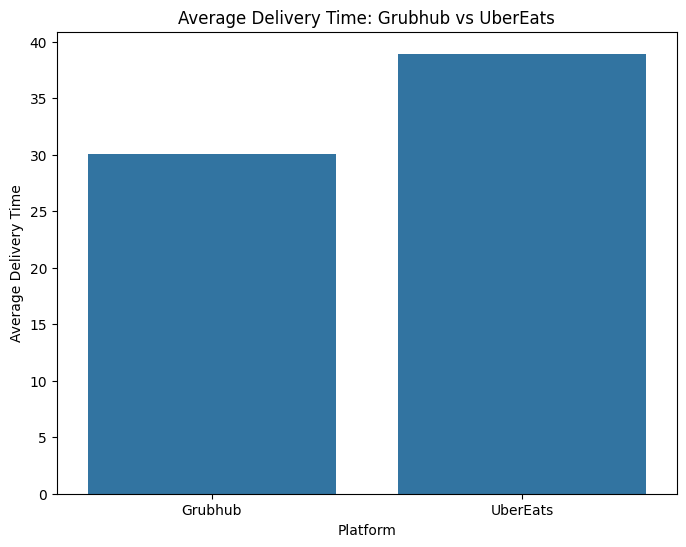

In [8]:
plt.figure(figsize=(8,6))
combined_data['Delivery Time'] = combined_data['Delivery Time'].replace({' min': '', ',': ''}, regex=True)
combined_data['Delivery Time'] = pd.to_numeric(combined_data['Delivery Time'], errors='coerce')
avg_delivery_time = combined_data.groupby('Platform')['Delivery Time'].mean()
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values)
plt.title('Average Delivery Time: Grubhub vs UberEats')
plt.xlabel('Platform')
plt.ylabel('Average Delivery Time')
plt.show()

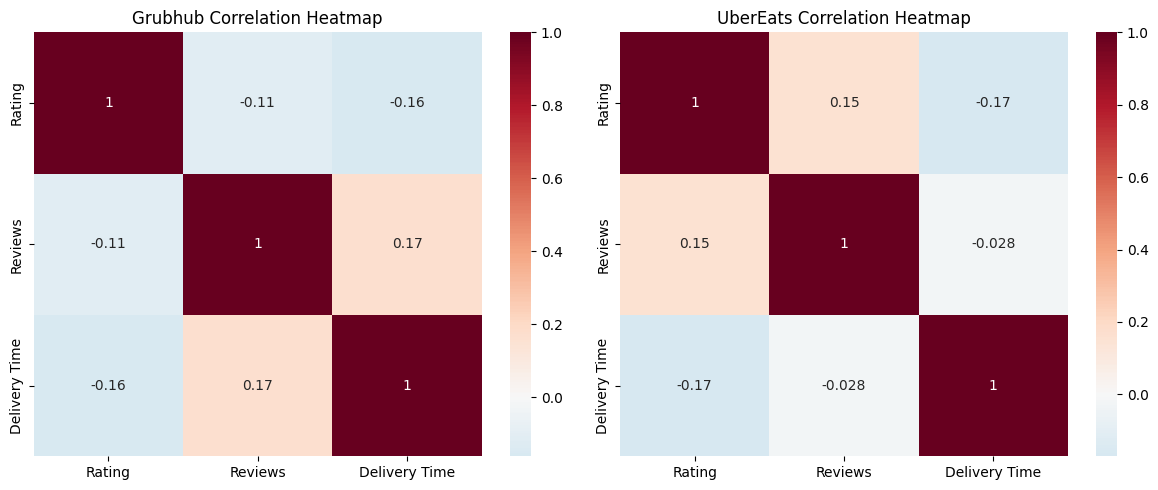

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for each platform
grubhub_only = combined_data[combined_data['Platform'] == 'Grubhub']
ubereats_only = combined_data[combined_data['Platform'] == 'UberEats']

# Compute correlation matrices
grubhub_corr = grubhub_only[['Rating', 'Reviews', 'Delivery Time']].corr()
ubereats_corr = ubereats_only[['Rating', 'Reviews', 'Delivery Time']].corr()

# Plot correlation heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(grubhub_corr, annot=True, cmap="RdBu_r", center=0, ax=axes[0])
axes[0].set_title("Grubhub Correlation Heatmap")

sns.heatmap(ubereats_corr, annot=True, cmap="RdBu_r", center=0, ax=axes[1])
axes[1].set_title("UberEats Correlation Heatmap")

plt.tight_layout()
plt.show()


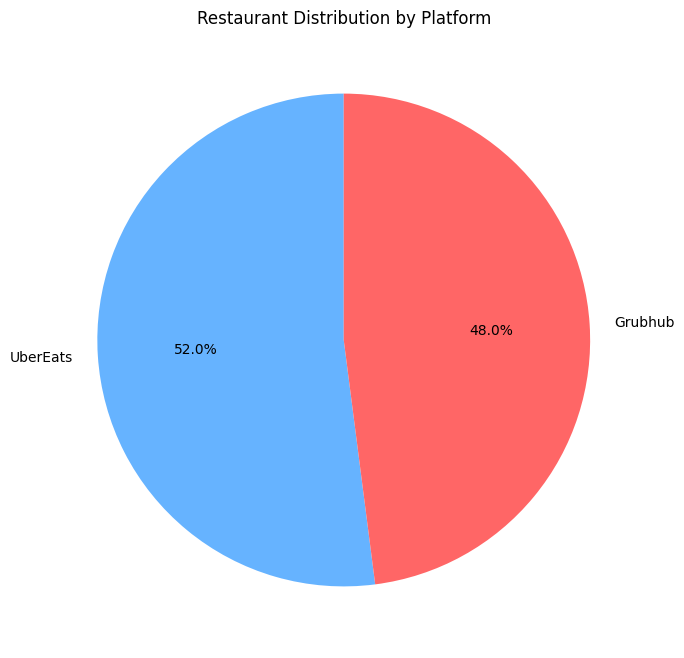

In [ ]:
platform_counts = combined_data['Platform'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Restaurant Distribution by Platform')
plt.show()